In [22]:
import pandas as pd
import numpy as np

## Visualisasi
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from IPython.display import display

Aktivitas Harian merupakan isian teks yang harus diisi pegawai BPKP untuk menjelaskan aktivitas apa yang dilakukan selama sehari pegawai tersebut bekerja.
Ketentuan singkat aktivitas harian sebagai berikut:
1. Wajib diisi pegawai minimal 1 record ketika pegawai melakukan WFO dan WFH(tahun 2024 hanya pegawai dengan kriteria tertentu yang diperbolehkan WFH)
2. ⁠Pengecekan kewajiban dilakukan saat presensi pulang
3. ⁠Dapat dihubungkan dengan penugasan yang sedang berjalan (ST SIMA)

Atribut awal yang disediakan
1. id - id record aktivitas harian
2. ⁠tanggal aktivitas - tanggal aktivitas dilakukan
3. ⁠unitkerja - id unitkerja dimana pegawai bekerja
4. ⁠pegawai - id pegawai yang melakukan aktivitas harian
5. ⁠usia - usia pegawai yang melakukan aktivitas harian
6. ⁠jabatan - id jabatan pegawai yang melakukan aktivitas harian
7. ⁠nama_aktivitas - teks isian aktivitas harian pegawai
8. ⁠id_penugasan - id penugasan SIMA, negatif/null menunjukkan tidak terhubung dengan SIMA (-1 Arahan, -2 Penugasan Rutin, -3 Inisiatif)

Atribut yang disediakan terbuka untuk ditambahkan melalui diskusi

Daftar singkatan
1. WFO : Work from Office
2. ⁠WFH : Work from Home
3. ⁠ST : Surat Tugas
4. ⁠SIMA : Sistem Informasi Manajemen Audit
5. ⁠PKPT : Program Kerja Pengawasan Tahunan (samakan jenis penugasan Reguler dengan PKPT)
6. ⁠PKAU : Program Kerja Administrasi Umum

**OBJECTIVE :**
**Analisi distribusi data kepegawaian harian pegawai dilakukan untuk melihat pola tertentu yang muncul pada dataset aktivitas harian dan pola yang muncul antar variable variable yang ada untuk digunakan sebagai acuan pengambilan keputusan bisnis perusahaan berdasarkan data real dan pola yang muncul**

In [23]:
# Load dataset
df = pd.read_csv('dataset_aktivitasharian.csv', delimiter=';')

# Konversi tanggal
df['tanggal_aktivitas'] = pd.to_datetime(df['tanggal_aktivitas'], errors='coerce')

# Filter data antara 1 Januari 2024 sampai 31 Januari 2024
df_new = df[(df['tanggal_aktivitas'] >= '2024-01-01') & (df['tanggal_aktivitas'] <= '2024-01-31')]

# Cek jumlah data setelah filter
print("Jumlah data setelah filter:", df_new.shape[0])


Jumlah data setelah filter: 101900


Insigh :

- Filtering data dilakukan untuk mengurangi jumlah data yang terlalu banyak pada dataset
- Filtering data bertujuan hanya mengambil data dan mengolah data khusus bulan Januari tahun 2024
- Setelah dilakukan filtering data jumlah data yang tersisa sebanyak 101900 rows, sehingga data ini lah yang akan digunakan untuk pengolahan data Analisis distribusi aktivitas harian kepegawaian 


In [24]:
df_new

,id,tanggal_aktivitas,unitkerja,pegawai,usia,jabatan,nama_aktivitas,id_penugasan,jenis_pkpt_pkau
0,4020826,2024-01-02,1,1,55,1,"Reviu draf berkas penu\n\ngasan, konsep lapora...",125443.0,PKPT-NG
1,4020833,2024-01-02,1,2,32,2,Penyelesaian Lapkin,-1.0,NaN
2,4020840,2024-01-02,1,3,37,3,Lapbul damit desember 2023,-2.0,NaN
3,4020841,2024-01-02,1,4,52,4,Anterjemput dir 5 dep.perek,-2.0,NaN
4,4020886,2024-01-02,1,5,60,5,monitoring penyelesaian tugas rutin,-1.0,NaN
...,...,...,...,...,...,...,...,...,...
988120,4124815,2024-01-31,49,4569,41,34,KeTUan,-1.0,NaN
988146,4127008,2024-01-30,49,5433,54,234,Mendata arsip,-1.0,NaN
988325,4133872,2024-01-25,49,5493,24,10,menyusun spj,-1.0,NaN
988326,4133873,2024-01-26,49,5493,24,10,menyusun spj,-1.0,NaN


**1. Analisis Distribusi Pegawai**

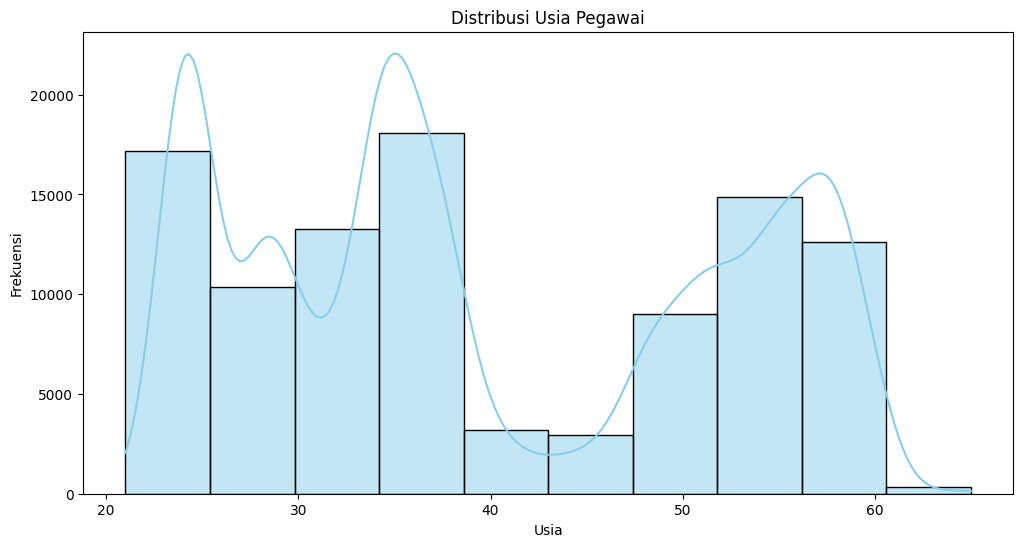

In [25]:
# Gunakan df_new langsung
df = df_new.copy()

plt.figure(figsize=(12, 6))
sns.histplot(df['usia'], bins=10, kde=True, color='skyblue')
plt.title("Distribusi Usia Pegawai")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101900 entries, 0 to 988327
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 101900 non-null  int64         
 1   tanggal_aktivitas  101900 non-null  datetime64[ns]
 2   unitkerja          101900 non-null  int64         
 3   pegawai            101900 non-null  int64         
 4   usia               101900 non-null  int64         
 5   jabatan            101900 non-null  int64         
 6   nama_aktivitas     101899 non-null  object        
 7   id_penugasan       100212 non-null  float64       
 8   jenis_pkpt_pkau    25705 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 7.8+ MB


**2. Analisis Frekuensi Aktivitas Harian Kepegawaian per Hari pada bulan Januari 2024**

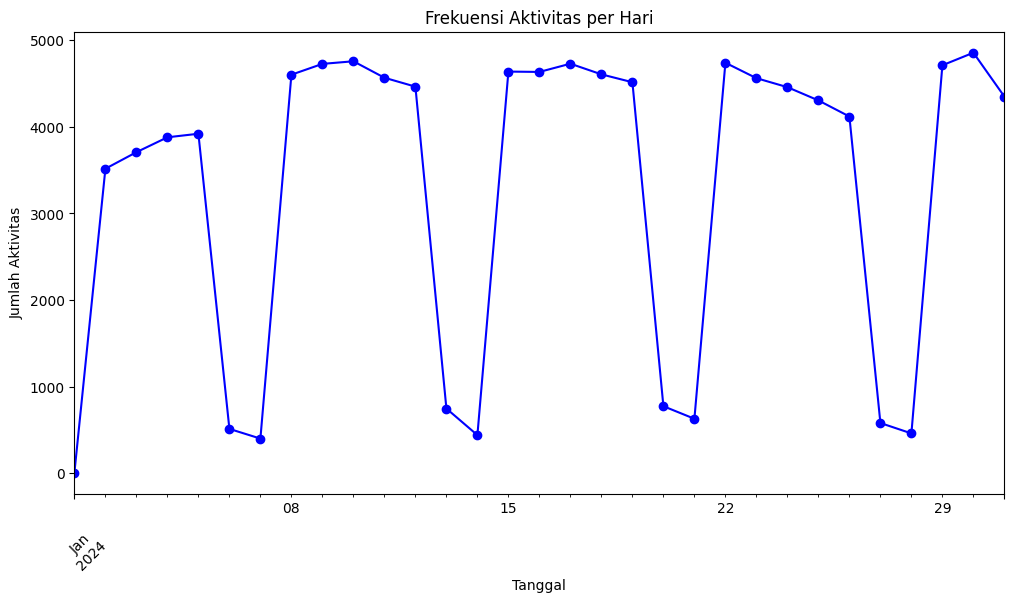

In [27]:

df['tanggal_aktivitas'] = pd.to_datetime(df['tanggal_aktivitas'])
daily_activity = df['tanggal_aktivitas'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
daily_activity.plot(kind='line', marker='o', color='blue')
plt.title("Frekuensi Aktivitas per Hari")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Aktivitas")
plt.xticks(rotation=45)
plt.show()

**3. Analisis Distribusi ID Penugasan pegawaian**

In [28]:
df['id_penugasan'] = pd.to_numeric(df['id_penugasan'], errors='coerce')
df['id_penugasan'] = df['id_penugasan'].fillna(0)  

In [29]:
df.isna().sum()

id                       0
tanggal_aktivitas        0
unitkerja                0
pegawai                  0
usia                     0
jabatan                  0
nama_aktivitas           1
id_penugasan             0
jenis_pkpt_pkau      76195
dtype: int64

In [30]:
data_kategori = {
    "Kategori ID Penugasan": ["Arahan (-1)", "Penugasan Rutin (-2)", "Inisiatif (-3)", "Tidak Terhubung dengan SIMA"],
    "Jumlah": [
        (df['id_penugasan'] == -1).sum(),
        (df['id_penugasan'] == -2).sum(),
        (df['id_penugasan'] == -3).sum(),
        (df['id_penugasan'] == 0).sum()  
    ]
}

df_kategori = pd.DataFrame(data_kategori)
print(df_kategori)

         Kategori ID Penugasan  Jumlah
0                  Arahan (-1)   46104
1         Penugasan Rutin (-2)   23681
2               Inisiatif (-3)    4699
3  Tidak Terhubung dengan SIMA    1689


Insigh :
Melakukan pengelompokkan id peugasan dengan setiap kategori penugasan sekaligus melakukan handle dan mengubah kategori pekerjaan yang tidak terhubung dengan SIMA

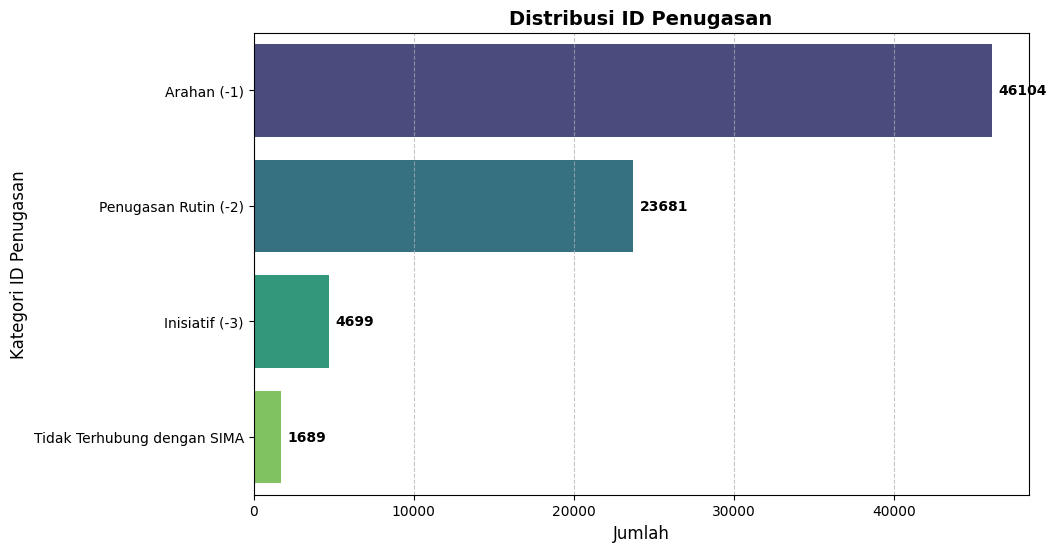

In [31]:
# Membuat bar chart horizontal
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=df_kategori["Kategori ID Penugasan"], x=df_kategori["Jumlah"], palette="viridis")

# Menambahkan label angka di setiap batang
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', 
                xytext=(5, 0), 
                textcoords='offset points', fontsize=10, color='black', fontweight='bold')

# Menambahkan judul dan label
plt.title("Distribusi ID Penugasan", fontsize=14, fontweight='bold')
plt.xlabel("Jumlah", fontsize=12)
plt.ylabel("Kategori ID Penugasan", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Menampilkan grafik
plt.show()

Insight :
- Berdasarkan Barplot dapat dilihat bahwa kategori ID penugasan paling banyak dilakukan oleh pegawai yaitu sesuai arahan sebanyak 46104 penugasan
- Kategori penugasan paling kecil yaitu sebanyak 1689 dimana penugasan tersebut tidak terhubung dengan SIMA

**4. Analisis AKtivitas yang paling sering dan paling jarang dilakukan Pegawai**

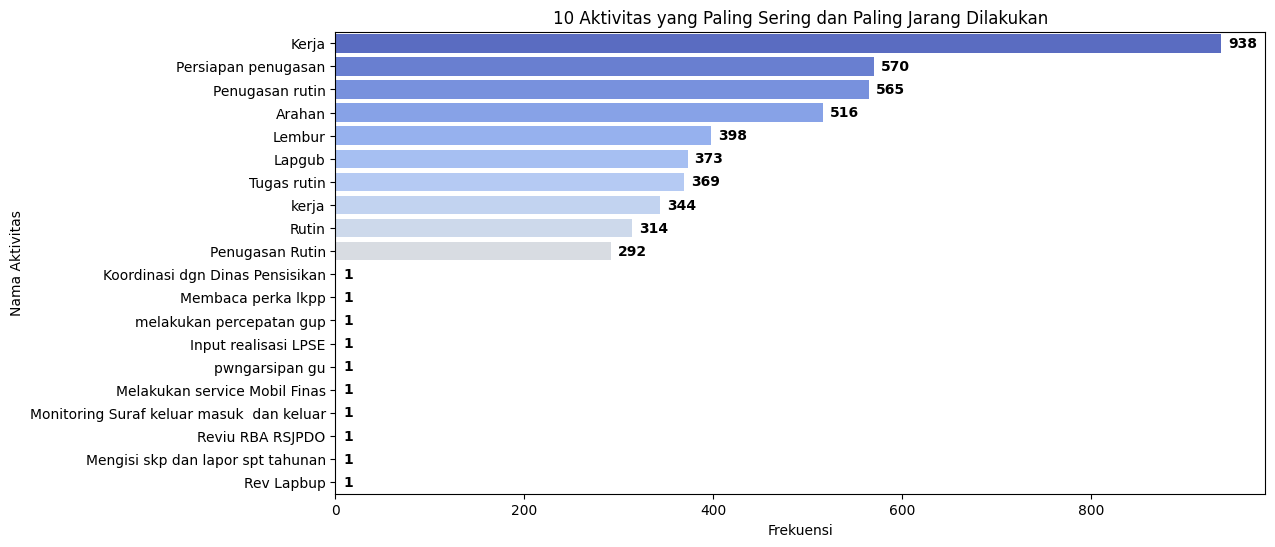

In [32]:
# Mengambil 10 aktivitas paling sering dan paling jarang dilakukan
aktivitas_terbanyak = df['nama_aktivitas'].value_counts().nlargest(10)
aktivitas_terjarang = df['nama_aktivitas'].value_counts().nsmallest(10)

# Menggabungkan kedua data
aktivitas_gabungan = pd.concat([aktivitas_terbanyak, aktivitas_terjarang])

# Membuat plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=aktivitas_gabungan.values, y=aktivitas_gabungan.index, palette="coolwarm")

plt.title("10 Aktivitas yang Paling Sering dan Paling Jarang Dilakukan")
plt.xlabel("Frekuensi")
plt.ylabel("Nama Aktivitas")

# Menambahkan label angka pada setiap batang
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', 
                xytext=(5, 0), 
                textcoords='offset points', fontsize=10, color='black', fontweight='bold')

plt.show()

Insight :
- Jenis Aktivitas yang paling dikerjakan oleh pegawai pada data yaitu 'Kerja' sebanyak 938 aktivitas
- Jenis aktivitas yang paling kecil cenderung sama di setiap pekerjaan yang dilakukan sesuai barplot diatas


**5. Analisis Distribusi Jenis PKPT-PKAU Pegawai**

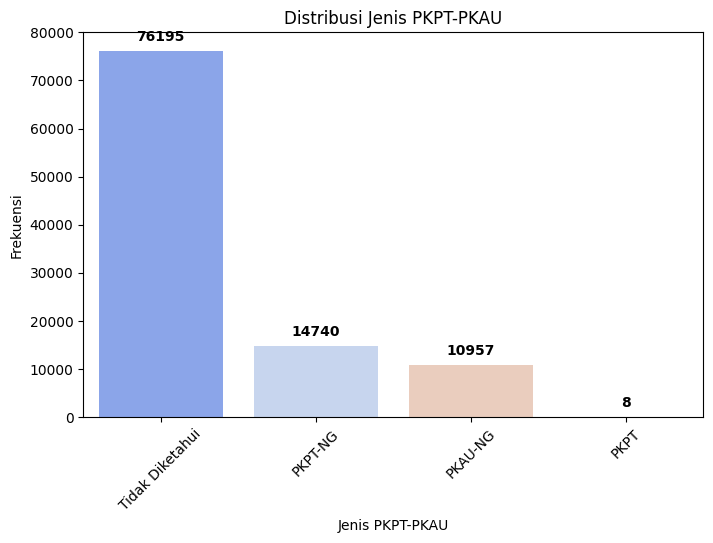

In [33]:
# Menangani NaN pada 'jenis_pkpt_pkau'
df['jenis_pkpt_pkau'] = df['jenis_pkpt_pkau'].fillna('Tidak Diketahui')
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='jenis_pkpt_pkau', data=df, palette='coolwarm', order=df['jenis_pkpt_pkau'].value_counts().index)
plt.title("Distribusi Jenis PKPT-PKAU")
plt.xlabel("Jenis PKPT-PKAU")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)

# Menambahkan label angka pada setiap batang
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                xytext = (0, 5), 
                textcoords = 'offset points', fontsize=10, color='black', fontweight='bold')

plt.show()

Insight :
- Distribusi Jenis PKPT-PKAU dominan berisi NAN / tidak diketahui disini saya berasumsi bahwa data ini memamng sengaja tidak diisi oleh pegawai sehingga tidak bisa dilakukan handling lebih lanjut
- Sedangkan jenis paling sedikit yaitu PKPT sebanyak 8 kali

**8. Analisis Distribusi Aktivitas berdasarkan unit kerja**

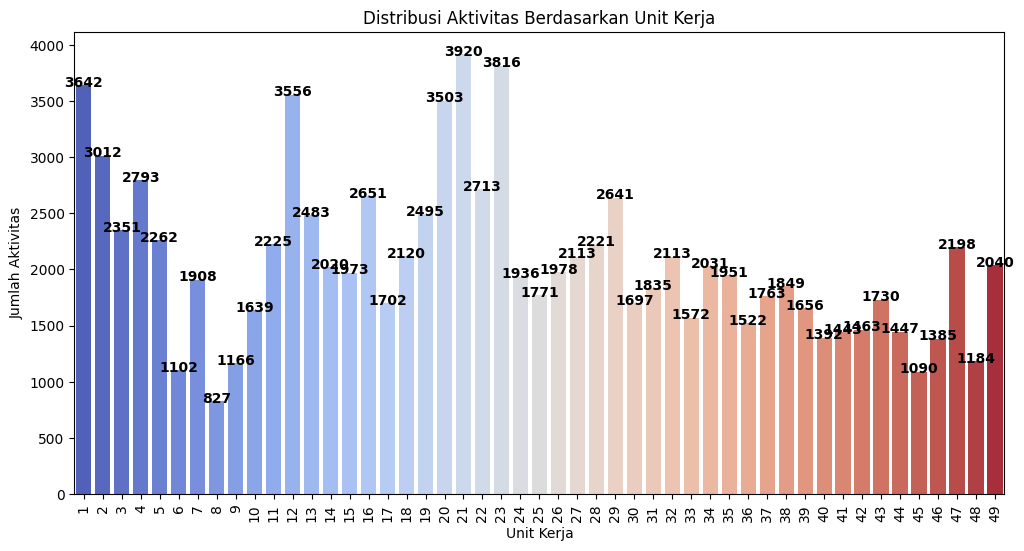

In [34]:
unit_kerja_aktivitas = df.groupby("unitkerja")["id"].count().reset_index()
unit_kerja_aktivitas.columns = ["unitkerja", "jumlah_aktivitas"]

plt.figure(figsize=(12,6))
ax = sns.barplot(data=unit_kerja_aktivitas, x="unitkerja", y="jumlah_aktivitas", palette="coolwarm")
plt.xlabel("Unit Kerja")
plt.ylabel("Jumlah Aktivitas")
plt.title("Distribusi Aktivitas Berdasarkan Unit Kerja")
plt.xticks(rotation=90)

# Menambahkan label angka pada setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 2), 
                textcoords = 'offset points', fontsize=10, color='black', fontweight='bold')

plt.show()

Insight :
- Distribusii Aktivitas disetiap unit pada bulan januari 2024 cenderung fluktuatif disetiap unit kerja

**9. Analisis Proporsi aktivitas yang terhubung dengan penugasan**

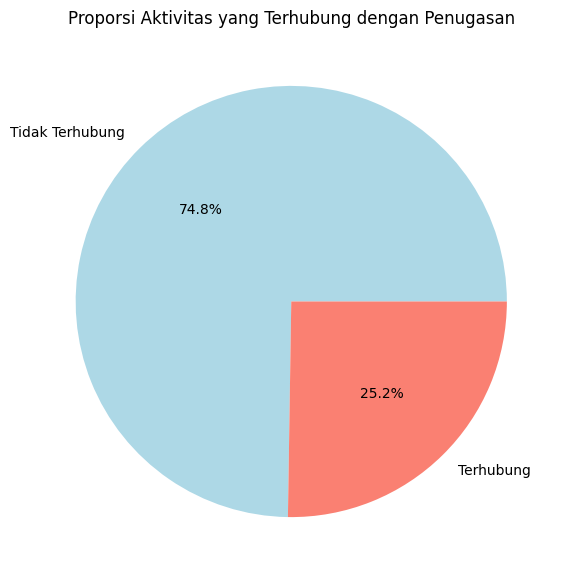

In [35]:
df['status_penugasan'] = df['id_penugasan'].apply(lambda x: "Terhubung" if x > 0 else "Tidak Terhubung")

penugasan_count = df['status_penugasan'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(penugasan_count, labels=penugasan_count.index, autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title("Proporsi Aktivitas yang Terhubung dengan Penugasan")
plt.show()

Insight : 
- Proporsi penugasan berdasarkan dengan penugasan berdasarkan pie chart diatas adalah aktivitas yang dilakukan berdasarkan id penugasan dengan status penugasan adalah 25.2 % yang terhubung dengan penugasan dan 74.8& yang tidak terhubung dengan penugasan

In [38]:
df.to_csv("Data aktivitas Kepegawain Clean.csv", index=False)  